## INTRODUCTION

L'objectif de ce projet est d'implémenter un schéma fromm et de comparer les résultats obtenus par ce schéma aux résultats obtenus par le Godunov d'ordre 1 déjà implémenté. Dans un premier temps, nous allons rapidement présenter le schéma fromm et d'où il vient/ sur quels principes il s'appuit. Dans un deuxième temps, nous nous concentrerons sur l'implémentation du code. Et enfin en dernier nous commenterons et analyserons les résultats obtenus et nous discuterons de ce qu'ils représentent.

## 1 - Partie théorique

Le but de cette partie est de présenter rapidement le schéma fromm. Le schéma fromm est un schéma numérique utilisé pour résoudre des équations aux dérivées partielles, en particulier pour les problèmes de transport et d'advection dans des flux de fluides. Il appartient aux méthodes de différences finies et se situe entre les schémas centrés et décentrés, car il combine les approches amont et aval pour minimiser la dissipation et la dispersion numérique. Dans notre cas, on va coder un schéma de Lax Wendroff et un schéma Beam Warming et faire la moyenne des deux flux obtenus, ce qui nous donnera donc un schéma fromm.

De manière très générale on a le schéma discrétisé suivant :

\begin{equation}
w_{j+1}^n=w_{j}^n - \nu (F_{j+1/2}^n-F_{j-1/2}^n)
\end{equation}

### Lax - Wendroff
Le Lax Wendroff est un schéma de second ordre en temps et en espace pour résoudre des équations d'évolution hyperboliques. Il est conçu pour être non dissipatif, ce qui le rend adapté pour des problèmes de propagation d'ondes sans perte de signal. Il utilise une expansion de Taylor en temps ce qui garantit un ordre élevé de précision en temps. C'est un schéma centré qui est définit comme :

\begin{equation}
    F_{j+1/2}^n = 0.5 \times (f(w_{j+1}^n) + f(w_{j}^n)) - \frac{A^2\nu}{2}[w_{j+1}^n - w_{j}^n]
\end{equation}

### Beam - Warming
Le Beam Warming est un schéma de type différences finies utilisée pour résoudre les équations hyperboliques. Il s'agit d'un schéma de deuxième ordre en espace et en temps, ce qui le rend plus précis que les schémas de premier ordre pour les simulations nécessitant une bonne résolution des variations spatiales et temporelles de la solution. C'est un schéma décentré à gauche définit comme :

\begin{equation}
    F_{j+1/2}^{n,+} = 0.5 \times (3f(w_{j}^n) + f(w_{j-1}^n)) - \frac{A^2\nu}{2}[w_{j}^n - w_{j-1}^n]
\end{equation}

Cette expression du flux numériue pour le Beam-Warming n'est valable que pour $A \geq 0$, d'où l'exposant $+$. En effet il sagit ici du schéma upwind Beam-Warming, donc si le "sens" du vent change, afin de rester upwind, il est nécessaire de modifier la formule ci-dessus. Ainsi, pour $A<0$, on a l'expression suivante :

\begin{equation}
    F_{j+1/2}^{n,-} = 0.5 \times (3f(w_{j}^n) + f(w_{j+1}^n)) - \frac{A^2\nu}{2}[w_{j}^n - w_{j+1}^n]
\end{equation}

On garde ici la notation $j+1/2$ pour le flux numérique afin d'indiquer que dans les deux cas ces flux peuvent être considérés comme ayant le même rôle, cependant noté ainsi on n'obtient pas le flux $F_{j-1/2}^n$ correspondant. Ce flux est donné par le relation suivante :

\begin{equation}
    F_{j-1/2}^{n,-} = 0.5 \times (3f(w_{j+1}^n) + f(w_{j+2}^n)) - \frac{A^2\nu}{2}[w_{j+1}^n - w_{j+2}^n]
\end{equation}

Par la suite dans le cas non linéaire, il sera nécessaire d'approximer $A$. Une forme très générale est la suivante :


\begin{equation}
    A_{j+1/2}^{n,+}=\frac{f(w_{j}^n)-f(w_{j-1}^n)}{w_{j}^n-w_{j-1}^n}, si w_{j}^n \neq w_{j-1}^n
\end{equation}
\begin{equation}
    A_{j+1/2}^{n,+}=A(w_{j-1}^n), si w_{j}^n = w_{j-1}^n
\end{equation}

Pour les différents tests réalisés ici, cela peut se simplifier de la façon suivante :
\begin{equation}
    A_{j+1/2}^{n,+}=0.5*(A(w_{j}^n)+A(w_{j-1}^n))
\end{equation}

On constatera par la suite la difficulté à gérer les points sonics dans le cas du Beam-Warming, lié au caractère décentré du domaine de dépendance numérique. Une façon de traiter ce problème est d'utiliser une méthode de séparation des flux, décrites dans le livre de C.B. Laney. Néanmoins, le traitement du test 5 s'est avéré infructueux avec la méthode décrite par Laney. Faute d'avoir essayer une méthode des flux moyens ou une méthode de reconstruction des flux, une première série de tests est effectué avec le schéma Beam-Warming pour $A \geq 0$. Ce schéma est donc faux pour le test 5 mais correct pour les autres tests. Cependant, il permet d'obtenir les meilleurs résultats pour le test 5. Sans rentrer dans les détailles des calculs, pour le test 5 le schéma Beam-Warming ne permet pas d'intégrér temporellement la solution puisque le bilan des flux est nul. 
Enfin un dernier test en utilisant le schéma Beam-Warming + flux séparés est mené pour illustrer la similitude des résultats pour les tests 1 à 4 et le résultat obtenu pour le test 5.

### Domaine de dépendance

Le schéma Lax-Wendroff est centré avec d'ordre 2, qui a donc pour domaine de dépendance numérique entre le temps $n+1$ et $n$, les cellules $j-1$ à $j+1$. Pour le schéma Beam-Warming, il sagit d'un schéma décentré à gauche, i.e. le domaine de dépendance entre $n+1$ et $n$ s'étend de la cellule $j-2$ à $j$. On a donc un shcéma décentré dont le domaine de dépendance s'étend de la cellule $j-2$ à $j+1$.

Dans ces conditions on peut considérer une condition CFL asymétrique selon le signe de A. Soit,
\begin{equation}
CFL < 2, Pour A>0
\end{equation}
\begin{equation}
CFL < 1, Pour A<0
\end{equation}

Dans les tests qui suivent, le rapport $\Delta t/\Delta x$ est fixé à 0.8 et $-1<A<1$ théoriquement. Ainsi la condition CFL reste a priori respecté dans chacun des tests. Cependant il ne s'agit pas d'une condition suffisante pour assurer la stabilité.

## 2 - Le code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import test_suite as ts
import misc as mi
epsilon = 1e-6
import GodunovFirstOrderUpwindScheme1 as godunov
import test_bis2 as tsb

In [2]:
#Définition de la classe Fromm : Schema fromm
class Fromm():
#Récupération des paramètres d'initialisation
    def __init__(self, testCase,beam_form="pos_wind"):
        self.dx = testCase.dx
        self.dt = testCase.dt
        self.tFinal = testCase.tFinal
        self.nu = testCase.nu
        self.u0 = testCase.u0
        self.flux = testCase.flux
        self.u_star = testCase.u_star
        self.a = testCase.a
        self.x = testCase.x
        self.uFinal = testCase.uFinal
        self.beam_form=beam_form
        
#Code du Beam Warming : Flux au pas j (FLux0) et au pas j+1(Flux1)
    def fillFlux0_Beam_pos_wind(self, w, f, a):
        N = w.shape[0] #Dimension de w pour permettre la création de tableaux de la même dimension
        a_ = np.empty(N) #Création du tableau de la matrice A 
        #Boucle de remplissage de la matrice A avec la formule A = 1/2(a(w[j-1]) +a(w[j-2])) avec a la vitesse de phase
        for j in range(2, N-2):
            a_[j] = 0.5*(a(w[j-1])+a(w[j-2]))
        flux = np.empty(N) #Création d'un tableau vide pour stocker les valeurs de flux
        flux[2:-2] = 0.5 *(3*f(w[1:-3])-f(w[0:-4]))  - 0.5 * a_[2:-2]*a_[2:-2]*self.nu *(w[1:-3] -  w[0:-4]) #Remplissage du tableau de flux avec la formule Beam
        flux = mi.fillGhosts(flux,num_of_ghosts=2)
        return flux

#Même procédé que pour le Flux au temps j mais au temps j+1 = Flux1
    def fillFlux1_Beam_pos_wind(self, w, f, a):
        N = w.shape[0]
        a_ = np.empty(N)
        for j in range(2, N-2):
            a_[j] = 0.5*(a(w[j])+a(w[j-1]))
        flux = np.empty(N)
        flux[2:-2] = 0.5 *(3*f(w[2:-2])-f(w[1:-3]))  - 0.5 * a_[2:-2]*a_[2:-2]*self.nu *( w[2:-2] -  w[1:-3])
        flux = mi.fillGhosts(flux,num_of_ghosts=2)
        return flux

    def fillFlux0_Beam_sep_flux(self, w, f, a):
        N = w.shape[0]
        flux = np.empty(N)

        a_plus = np.empty(N)
        a_moins=np.empty(N)
        for j in range(2, N-2):
            j1plus=a(w[j-1])>=0 #
            j2plus=a(w[j-2])>=0 # Permet de définir la séparation des flux entre les flux pour A>=0 et les flux pour A<0.
            j1moins=a(w[j+1])<0 # Pour cela on utilise des tests conditionnels, ainsi avec le formalisme de Laney on a,
            j2moins=a(w[j+2])<0 # f+=f*jplus et f-=f*jmoins
            
            if np.fabs(w[j-1]-w[j-2])<epsilon:
                a_plus[j]=a(w[j-2])*j2plus
            else:
                a_plus[j]=(f(w[j-1])*j1plus-f(w[j-2])*j2plus)/(w[j-1]-w[j-2])
            if np.fabs(w[j+2]-w[j+1])<epsilon:
                a_moins[j]=a(w[j+1])*j1moins
            else:
                a_moins[j]=(f(w[j+2])*j2moins-f(w[j+1])*j1moins)/(w[j+2]-w[j+1])
            
            flux[j] = 0.5*(3*(f(w[j-1])*j1plus+f(w[j+1])*j1moins) - (f(w[j-2])*j2plus+f(w[j+2])*j2moins)) - 0.5*a_plus[j]*self.nu*(f(w[j-1])*j1plus-f(w[j-2])*j2plus) -0.5*a_moins[j]*self.nu*(-f(w[j+1])*j1moins+f(w[j+2])*j2moins)
            
        flux = mi.fillGhosts(flux,num_of_ghosts=2)
        return flux

    def fillFlux1_Beam_sep_flux(self, w, f, a):
        N = w.shape[0]
        flux = np.empty(N)
        
        a_plus = np.empty(N)
        a_moins=np.empty(N)
        for j in range(2, N-2):
            jplus=a(w[j])>=0    #
            j1plus=a(w[j-1])>=0 # Permet de définir la séparation des flux entre les flux pour A>=0 et les flux pour A<0
            jmoins=a(w[j])<0    # Pour cela on utilise des tests conditionnels, ainsi avec le formalisme de Laney on a,
            j1moins=a(w[j+1])<0 # f+=f*jplus et f-=f*jmoins
            
            if np.fabs(w[j]-w[j-1])<epsilon:
                a_plus[j]=a(w[j-1])*j1plus
            else:
                a_plus[j]=(f(w[j])*jplus-f(w[j-1])*j1plus)/(w[j]-w[j-1])
            if np.fabs(w[j]-w[j+1])<epsilon:
                a_moins[j]=a(w[j])*jmoins
            else:
                a_moins[j]=(f(w[j+1])*j1moins-f(w[j])*jmoins)/(w[j+1]-w[j])
            flux[j] = 0.5*(3*(f(w[j])*jplus+f(w[j])*jmoins) - (f(w[j-1])*j1plus+f(w[j+1])*j1moins)) - 0.5*a_plus[j]*self.nu*(f(w[j])*jplus-f(w[j-1])*j1plus) -0.5*a_moins[j]*self.nu*(-f(w[j])*jmoins+f(w[j+1])*j1moins)

        flux = mi.fillGhosts(flux,num_of_ghosts=2)
        return flux
        
#Code du Lax Wendroff : Flux au pas j (FLux0) et au pas j+1(Flux1)
    def fillFlux0_Lax(self, w, f, a):
        N=w.shape[0]
        a_=np.empty(N)
        for i in range(1,N-1):
            a_[i]=a(w[i])
        flux=np.empty(N)
        flux[1:-1]=0.5 *(f(w[1:-1])+f(w[0:-2]))  - 0.5 * a_[1:-1]*a_[1:-1]*self.nu *(w[1:-1] -  w[0:-2])
        flux=mi.fillGhosts(flux)
        return flux
 
    def fillFlux1_Lax(self, w, f, a):
        N=w.shape[0]
        a_=np.empty(N)
        for i in range(1,N-1):
            a_[i]=a(w[i+1])
        flux=np.empty(N)
        flux[1:-1]=0.5 *(f(w[2:])+f(w[1:-1]))  - 0.5 * a_[1:-1]*a_[1:-1]*self.nu *(w[2:] -  w[1:-1])
        flux=mi.fillGhosts(flux)
        
        return flux

    def fillFlux0_Beam(self, w, f, a):
        if self.beam_form=="pos_wind":
            return self.fillFlux0_Beam_pos_wind(w, f, a)
        elif self.beam_form=="sep_flux":
            return self.fillFlux0_Beam_sep_flux(w, f, a)

    def fillFlux1_Beam(self, w, f, a):
        if self.beam_form=="pos_wind":
            return self.fillFlux1_Beam_pos_wind(w, f, a)
        elif self.beam_form=="sep_flux":
            return self.fillFlux1_Beam_sep_flux(w, f, a)
    
#Définition de la fonction compute
    def compute(self, tFinal):
        Nt = int(tFinal/self.dt) #Nombre de pas de temps final
        dx = self.dx #Pas d'espace

        u0w = mi.addGhosts(self.u0(self.x),num_of_ghosts=2) #Initialisation de u = u0
        u0w = mi.fillGhosts(u0w,num_of_ghosts=2) #Remplissage periodique des cases fantômes

        xw = mi.addGhosts(self.x,num_of_ghosts=2) #Ajustement de x à la dimension de w
        
        xw[1]=xw[2]-dx
        xw[0] = xw[1]-dx
        xw[-2]= xw[-3]+dx
        xw[-1] = xw[-2]+dx
        
        #Création de tableaux vides pour u au temps n+1 et le flux au pas j et j+1
        u1w = np.empty((u0w.shape[0])) 
        F0w = np.empty((u0w.shape[0]))
        F1w = np.empty((u0w.shape[0]))

        for i in range(Nt):
            #Code du fromm = 0.5(Flux(Lax) + Flux(Beam))
            F0w = 0.5*(self.fillFlux0_Beam(u0w, self.flux, self.a) + self.fillFlux0_Lax(u0w, self.flux, self.a)) 
            F1w = 0.5*(self.fillFlux1_Beam(u0w, self.flux, self.a) + self.fillFlux1_Lax(u0w, self.flux, self.a))
            F1w = mi.fillGhosts(F1w,num_of_ghosts=2)

            u1w[2:-2] = u0w[2:-2] - self.nu * (F1w[2:-2] - F0w[2:-2]) #Détermination de u1 au pas n+1 en prenant en compte l'équation dtu + dxf = 0 et en discrétisant
            u1w = mi.fillGhosts(u1w,num_of_ghosts=2) #Remplissage des cases fantomes par des conditions périodiques
            u0w = u1w

        self.uF = u1w[2:-2]


## 3 - Calcul et analyse

## TEST CONVERGENCE ##

On cherche à voir comment notre schéma converge pour chaque test. Pour cela, on commence par calculer l'erreur quadratique pour deux tests différents : l'un avec un $\Delta x$ élevé et l'un pour un $\Delta x$ plus faible. On utilise la formule pour calculer le pas de convergence : 

\begin{equation}
p = log(L_2(1) - L_2(2)) / log(dx1/dx2)
\end{equation}

Notre schéma étant d'ordre 2, on s'attend à obtenir un pas p $\approx$ 2. 

In [3]:
import test_conv5 as tst
tstc = tst.Test1()
schemec = Fromm(tstc)
schemec.compute(schemec.tFinal)

tstc2 = tst.Test2()
schemec2 = Fromm(tstc2)
schemec2.compute(schemec2.tFinal)

tstc3 = tst.Test3()
schemec3 = Fromm(tstc3)
schemec3.compute(schemec3.tFinal)

tstc4 = tst.Test4()
schemec4 = Fromm(tstc4)
schemec4.compute(schemec4.tFinal)

tstc5 = tst.Test5()
schemec5 = Fromm(tstc5)
schemec5.compute(schemec5.tFinal)

def compute_l2_error(u_num, u_exact, dx):
    return np.sqrt(np.sum((u_num - u_exact) ** 2) * dx)
    
def calcul_conv(scheme, schemec):
    u_analytic = schemec.uFinal
    u_numeric1 = schemec.uF
    x_numeric1 = schemec.x
    dx1 = schemec.dx
    u_analytic2 = scheme.uFinal
    u_numeric2 = scheme.uF
    x_numeric2 = scheme.x
    dx2 = scheme.dx

    #Erreur quadratique 
    dx11 = x_numeric1[1] - x_numeric1[0]  
    L2_1 = compute_l2_error(u_numeric1, u_analytic, dx11)
    dx21 = x_numeric2[1] - x_numeric2[0]  
    L2_2 = compute_l2_error(u_numeric2, u_analytic2, dx12)
    L2_2n = L2_2[~np.isnan(L2_2)]

    # Calcul de l'ordre de convergence
    p = np.log(L2_2 / L2_1) / np.log(dx12 / dx11)

    return p, L2_1, L2_2, dx11, dx21

tst1 = calcul_conv(scheme,schemec)
tst2 = calcul_conv(scheme2,schemec2)
tst3 = calcul_conv(scheme3,schemec3)
tst4 = calcul_conv(scheme4,schemec4)
tst5 = calcul_conv(scheme5,schemec5)
print("Valeur de p pour Test1 = ", tst1[0])
print("Valeur de p pour Test2 = ", tst2[0])
print("Valeur de p pour Test3 = ", tst3[0])
print("Valeur de p pour Test4 = ", tst4[0])
print("Valeur de p pour Test5 = ", tst5[0])

NameError: name 'scheme' is not defined

On remarque que la seule valeur de p qui s'approche de 2 est celle pour le Test1 donc pour le sinus. Etant donné que c'est une fonction linéaire sans aucune discontinuité, on peut montrer que le Fromm est un schéma efficace pour ce genre de fonction. En revanche, pour les autres tests, p << 2 ce qui signifie que le schéma ne converge pas bien et qu'il n'est pas très bon pour approximer les fonctions avec des discontinuités.

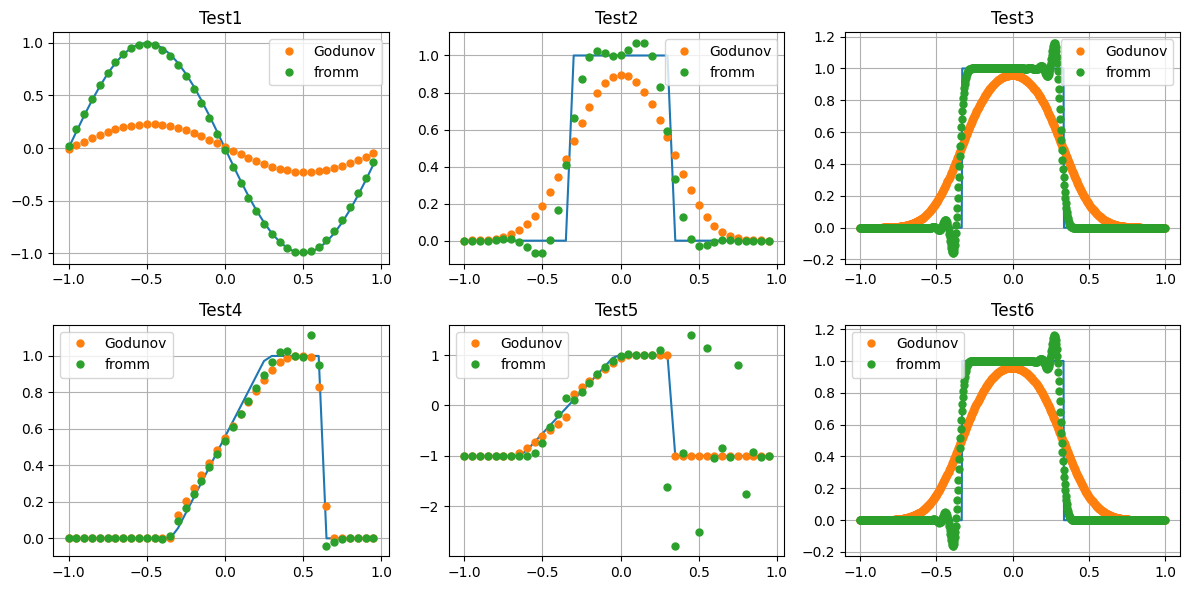

In [4]:
#Vérification des tests : comparaison fromm Godunov
#Test 1
tst = ts.Test1()
scheme = Fromm(tst)
schemegov = godunov.Godunov1(tst, form='vanilla')
scheme.compute(scheme.tFinal)
schemegov.compute(schemegov.tFinal)

#Test2
tst2 = ts.Test2()
scheme2 = Fromm(tst2)
schemegov2 = godunov.Godunov1(tst2, form='vanilla')
scheme2.compute(scheme2.tFinal)
schemegov2.compute(schemegov2.tFinal)

#Test3
tst3 = ts.Test3()
scheme3 = Fromm(tst3)
schemegov3 = godunov.Godunov1(tst3, form='vanilla')
scheme3.compute(scheme3.tFinal)
schemegov3.compute(schemegov3.tFinal)

#Test4
tst4 = ts.Test4()
scheme4 = Fromm(tst4)
schemegov4 = godunov.Godunov1(tst4, form='vanilla')
scheme4.compute(scheme4.tFinal)
schemegov4.compute(schemegov4.tFinal)

#Test5
tst5 = ts.Test5()
scheme5 = Fromm(tst5)
schemegov5 = godunov.Godunov1(tst5, form='vanilla')
scheme5.compute(scheme5.tFinal)
schemegov5.compute(schemegov5.tFinal)

#Test6 
tst6 = tsb.Test6()
scheme6 = Fromm(tst6)
schemegov6 = godunov.Godunov1(tst6, form='vanilla')
scheme6.compute(scheme6.tFinal)
schemegov6.compute(schemegov6.tFinal)

fig, axs = plt.subplots(2, 3, figsize=(12, 6))
axs[0, 0].plot(scheme.x, scheme.uFinal)
axs[0, 0].plot(schemegov.x, schemegov.uF, marker = "o", markersize=5, linestyle = "None",label ="Godunov")
axs[0, 0].plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None",label = "fromm")
axs[0, 0].legend(loc="upper right")
axs[0, 0].grid(True)
axs[0, 0].set_title("Test1")

axs[0, 1].plot(scheme2.x, scheme2.uFinal)
axs[0, 1].plot(schemegov2.x, schemegov2.uF, marker = "o", markersize=5, linestyle = "None",label ="Godunov")
axs[0, 1].plot(scheme2.x, scheme2.uF, marker = "o", markersize=5, linestyle = "None",label = "fromm")
axs[0, 1].legend(loc="upper right")
axs[0, 1].grid(True)
axs[0, 1].set_title("Test2")

axs[0, 2].plot(scheme3.x, scheme3.uFinal)
axs[0, 2].plot(schemegov3.x, schemegov3.uF, marker = "o", markersize=5, linestyle = "None",label ="Godunov")
axs[0, 2].plot(scheme3.x, scheme3.uF, marker = "o", markersize=5, linestyle = "None",label="fromm")
axs[0, 2].legend(loc="upper right")
axs[0, 2].grid(True)
axs[0, 2].set_title("Test3")

axs[1, 0].plot(scheme4.x, scheme4.uFinal)
axs[1, 0].plot(schemegov4.x, schemegov4.uF, marker = "o", markersize=5, linestyle = "None",label ="Godunov")
axs[1, 0].plot(scheme4.x, scheme4.uF, marker = "o", markersize=5, linestyle = "None",label = "fromm")
axs[1, 0].legend(loc="upper left")
axs[1, 0].grid(True)
axs[1, 0].set_title("Test4")

axs[1, 1].plot(scheme5.x, scheme5.uFinal)
axs[1, 1].plot(schemegov5.x, schemegov5.uF, marker = "o", markersize=5, linestyle = "None",label ="Godunov")
axs[1, 1].plot(scheme5.x, scheme5.uF, marker = "o", markersize=5, linestyle = "None",label = "fromm")
axs[1, 1].legend(loc="upper left")
axs[1, 1].grid(True)
axs[1, 1].set_title("Test5")

axs[1, 2].plot(scheme6.x, scheme6.uFinal)
axs[1, 2].plot(schemegov6.x, schemegov6.uF, marker = "o", markersize=5, linestyle = "None",label ="Godunov")
axs[1, 2].plot(scheme6.x, scheme6.uF, marker = "o", markersize=5, linestyle = "None",label = "fromm")
axs[1, 2].legend(loc="upper left")
axs[1, 2].grid(True)
axs[1, 2].set_title("Test6")

plt.tight_layout()
plt.show()

## Analyse

La littérature nous donne pour l'erreur de troncature du schéma Fromm:

\begin{equation}
\frac{\partial u}{\partial t} + \frac{\partial u}{\partial x} = \frac{a \Delta x^2}{6} (1 - \lambda a)\frac{\partial u^3}{\partial x^3} - \frac{a \Delta x^3}{8}(1 - \lambda a)((\lambda a)^2 - \lambda a + 1)\frac{\partial u^4}{\partial x^4}
\end{equation}

Où $\lambda$ correspond à $\frac{\Delta x}{\Delta t}$

Les termes contenant une dérivée d'ordre impair correspondent à la dispersion numérique et les termes pair à de la diffusion numérique introduisant un effet de lissage.

On s'attend donc à ce que lors des transitions abruptes donc des dérivées importantes le schéma Fromm ait du mal à suivre la solution

## Test 1

Le schéma de Fromm suit très bien la forme sinusoïdale de l'onde. Le schéma de Godunov semble introduire une dissipation numérique, ce qui "lisse" l'amplitude des oscillations.

Le schéma de Fromm est plus précis pour ce type de flux continu et régulier. Godunov est dissipatif, ce qui peut être un avantage dans des flux présentant des chocs mais est moins précis pour des ondes douces.

## Test 2

Le schéma de Fromm présente des oscillations près des discontinuités. Le schéma de Godunov gère mieux les chocs, avec une transition plus "plate" et stable.

Les oscillations de Fromm sont dues à son caractère centré, qui ne gère pas correctement les discontinuités. Godunov, avec sa nature plus dissipative, stabilise la discontinuité.

## Test 3

Les oscillations du schéma de Fromm sont plus visibles, particulièrement sur le front montant. Godunov reste plus lisse mais montre une diffusion accrue, ce qui arrondit les fronts.

Encore une fois, le schéma de Fromm souffre de ses oscillations autour des transitions abruptes, ce qui peut poser problème pour des flux avec gradients importants. Godunov dissipe plus les gradients, mais reste stable.

## Test 4

Les oscillations spurielles de Fromm apparaissent aux points de changement de pente (comme les fronts abrupts). Godunov reste stable mais perd des détails (effet de diffusion numérique).

Ce test met en évidence la limite des schémas centrés pour gérer les discontinuités et transitions fortes.

## Test 5

Le schéma de Fromm a du mal à gérer la discontinuité, avec des oscillations significatives. Godunov gère bien le choc mais diffuse le plateau.

Fromm échoue dans ce cas car il est mal adapté aux écoulements avec des chocs. Godunov perd en précision dans les zones lisses (plateaux) à cause de sa dissipation.

## Test 6

Le test 6 est l'homologue du test 3 avec une vitesse négative.

Fromm montre des oscillations importantes autour des fronts. Godunov lisse les fronts et réduit les oscillations mais arrondit le profil général.

Fromm est instable près des chocs. Godunov sacrifie la précision pour garantir la stabilité.


## Méthode des flux séparés

In [5]:
#Test 1
tst = ts.Test1()
scheme = Fromm(tst,beam_form='sep_flux')
schemegov = godunov.Godunov1(tst, form='vanilla')
scheme.compute(scheme.tFinal)
schemegov.compute(schemegov.tFinal)

#Test2
tst2 = ts.Test2()
scheme2 = Fromm(tst2,beam_form='sep_flux')
schemegov2 = godunov.Godunov1(tst2, form='vanilla')
scheme2.compute(scheme2.tFinal)
schemegov2.compute(schemegov2.tFinal)

#Test3
tst3 = ts.Test3()
scheme3 = Fromm(tst3,beam_form='sep_flux')
schemegov3 = godunov.Godunov1(tst3, form='vanilla')
scheme3.compute(scheme3.tFinal)
schemegov3.compute(schemegov3.tFinal)

#Test4
tst4 = ts.Test4()
scheme4 = Fromm(tst4,beam_form='sep_flux')
schemegov4 = godunov.Godunov1(tst4, form='vanilla')
scheme4.compute(scheme4.tFinal)
schemegov4.compute(schemegov4.tFinal)

#Test5
tst5 = ts.Test5()
scheme5 = Fromm(tst5,beam_form='sep_flux')
schemegov5 = godunov.Godunov1(tst5, form='vanilla')
scheme5.compute(scheme5.tFinal)
schemegov5.compute(schemegov5.tFinal)

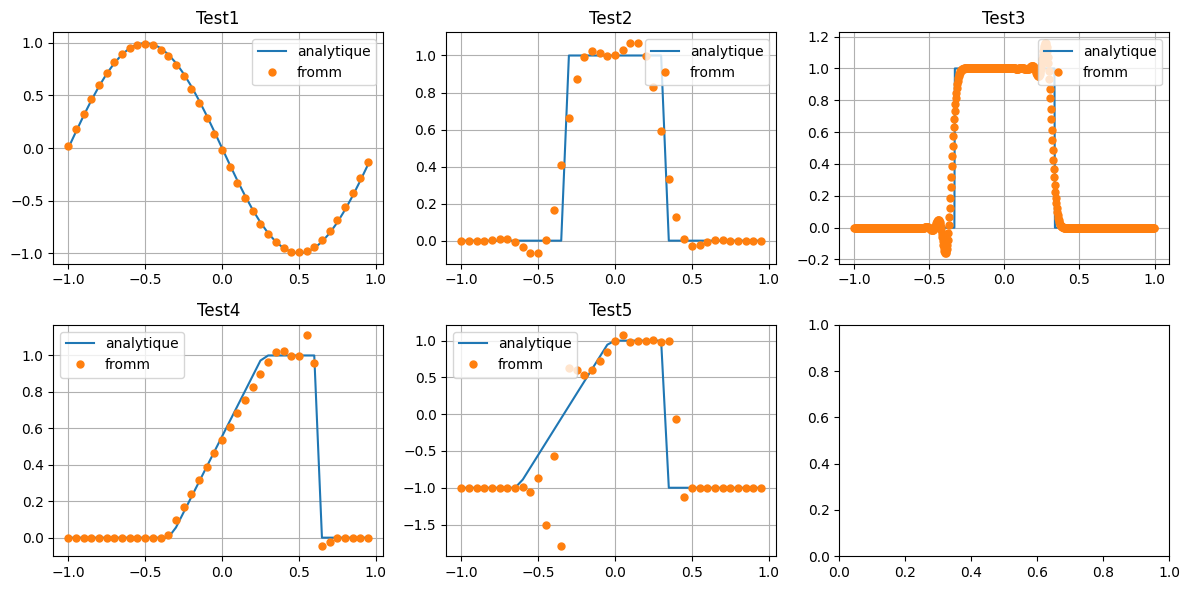

In [6]:

fig, axs = plt.subplots(2, 3, figsize=(12, 6))
axs[0, 0].plot(scheme.x, scheme.uFinal,label='analytique')
axs[0, 0].plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None",label = "fromm")
axs[0, 0].legend(loc="upper right")
axs[0, 0].grid(True)
axs[0, 0].set_title("Test1")

axs[0, 1].plot(scheme2.x, scheme2.uFinal,label='analytique')
axs[0, 1].plot(scheme2.x, scheme2.uF, marker = "o", markersize=5, linestyle = "None",label = "fromm")
axs[0, 1].legend(loc="upper right")
axs[0, 1].grid(True)
axs[0, 1].set_title("Test2")

axs[0, 2].plot(scheme3.x, scheme3.uFinal,label='analytique')
axs[0, 2].plot(scheme3.x, scheme3.uF, marker = "o", markersize=5, linestyle = "None",label="fromm")
axs[0, 2].legend(loc="upper right")
axs[0, 2].grid(True)
axs[0, 2].set_title("Test3")

axs[1, 0].plot(scheme4.x, scheme4.uFinal,label='analytique')
axs[1, 0].plot(scheme4.x, scheme4.uF, marker = "o", markersize=5, linestyle = "None",label = "fromm")
axs[1, 0].legend(loc="upper left")
axs[1, 0].grid(True)
axs[1, 0].set_title("Test4")

axs[1, 1].plot(scheme5.x, scheme5.uFinal,label='analytique')
axs[1, 1].plot(scheme5.x, scheme5.uF, marker = "o", markersize=5, linestyle = "None",label = "fromm")
axs[1, 1].legend(loc="upper left")
axs[1, 1].grid(True)
axs[1, 1].set_title("Test5")

plt.tight_layout()
plt.show()

On constate alors que pour les tests 1 à 4 les résultats sont inchangés, ce qui est bien sûr cohérent avec le fait que $A \geq 0$ dans ces tests. De plus on observe que pour le test 5 la méthode des flux séparés semble avoir amélioré le calcul pour le choc mais a dégradé la solution dans la partie raréfaction. En fait si on se concentre uniquement sur le rôle du Beam-Warming dans ce test, on constate que les résultats ne sont pas concluants.

In [10]:
test=ts.Test5()
scheme = Fromm(test,beam_form='sep_flux')
scheme.fillFlux0_Lax=scheme.fillFlux0_Beam
scheme.fillFlux1_Lax=scheme.fillFlux1_Beam
scheme.compute(scheme.tFinal)

Text(0.5, 1.0, 'Test5')

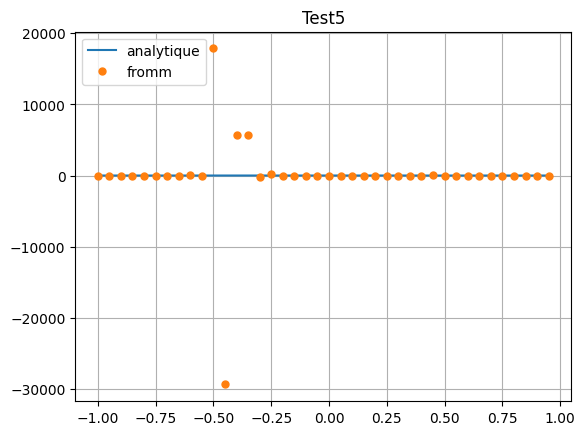

In [11]:
plt.plot(scheme.x, scheme.uFinal,label='analytique')
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None",label = "fromm")
plt.legend(loc="upper left")
plt.grid(True)
plt.title("Test5")

On a alors une divergence dans la zone de raréfaction, qui indique certainement une erreur d'implémentation de la méthode. Néanmoins après plusieurs essais, nous n'avons pas réussi à identifier l'erreur. De plus si on s'intéresse au choc on constate que l'amélioration est minime. Certes l'amplitude de l'instabilité semble très largement réduite, néanmoins le résultat n'est pas celui attendu.

Text(0.5, 1.0, 'Test5')

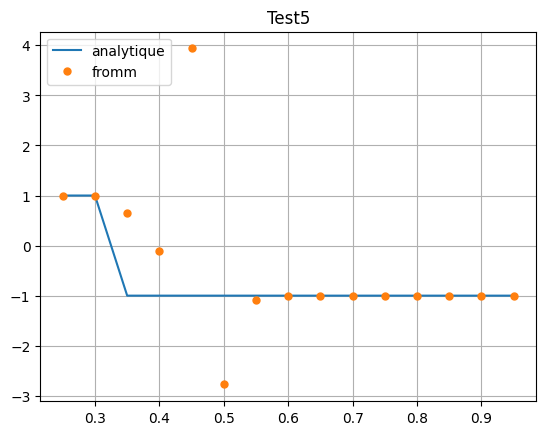

In [12]:
plt.plot(scheme.x[-15:], scheme.uFinal[-15:],label='analytique')
plt.plot(scheme.x[-15:], scheme.uF[-15:], marker = "o", markersize=5, linestyle = "None",label = "fromm")
plt.legend(loc="upper left")
plt.grid(True)
plt.title("Test5")

Néanmoins ces difficultés ont permis de s'intéresser longuement à la problématique du traitement des points soniques. En effet, l'idée dérrière la méthode des flux séparés dans le contexte du test 5 était, d'une part intégrer les deux formes du Beam-Warming citées au début et d'autre part de modéliser au mieux le bilan des flux proche des discontinuitées.

Dans le cas d'un choc, dans cette étude on peut considérer que l'information se propage en direction du choc, de chaque côté, du fait du changement signe + ==> -. Cette configuration amène à penser que pour les cellules proches de la discontinuité l'information est suceptible de traverser le choc, ainsi il est nécessaire de prendre en compte dans le calcul des flux numériques, la contribution de l'information voyageant dans le sens opposés aux sens local.

Dans le cas d'une raréfaction, on observe la transition inverse - ==> +. Ainsi on peut suposer ici que l'information ne peut pas traverser cette frontière. Il ne semble alors pas nécessaire de prendre la contribution de l'information voyageant dans le sens opposé au sens local.

A partir de ces deux observations, on peut estimer que l'amélioration observer au niveau du choc est liée à la prise en compte de cette contribution, qui n'était donc pas pris en compte dans le premier modèle de Beam-Warming. Ce modèle peut être considérer "mono-directionnel". 

Au contraire, dans le cas de la raréfaction, on peut estimer que la dégradation est liée à la pris en compte, probablement mal abordée dans l'implémentation ici, de l'information pouvant traverser la discontinuité. 

L'utilisation d'une méthode Beam-Warming "bi-directionnel" comme dans le dernier test est néanmoins censée être une meilleure solution. Faute d'avoir réussi à débugger la méthode une explication est donc proposée ci-dessus.